### Election Night Non-Linear Prediction Practice

* Just practicing some pytorch
* Tonight will be the last night of this GPU before I send it to replace my dual Titan Xps in the JupyterLab server
* After a few bad runs of 7900 XTX I (because I like pain) over nighted another ASRock 7900 XTX Creator blower style
* * The dream of running of these in my daily driver is still real

### I AM DUMB, LETS GET STARTED

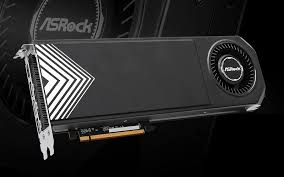

### Why dont they make more blower cards... Wattage is heading the correct direction now

* I want to upgrade my 14700k but I don't feel like there is anything worth going to. 
* 9950X would be cool but functionally would have 0 impact on daily compute life
* I think the only upgrade would be to move back to a dual gen 4 x16 mb like a MSI Meg Ace, ASRock Taichi or Proart Z790 and keep the 14700k
* Even going to a 14900K or KS really would not do much if anything
* Benchmarking has gotten super lame, no one games at 720p 600fps, that is simply silly
* I get the sentiment of pushing CPU but synthetics are mostly stupid, they didnt used to be
* * things like cinebench r23 are still pretty valid as it does give you a representation of useful horsepower and literal temps underload for a specific workload type

### TOUGHTSHHSHS


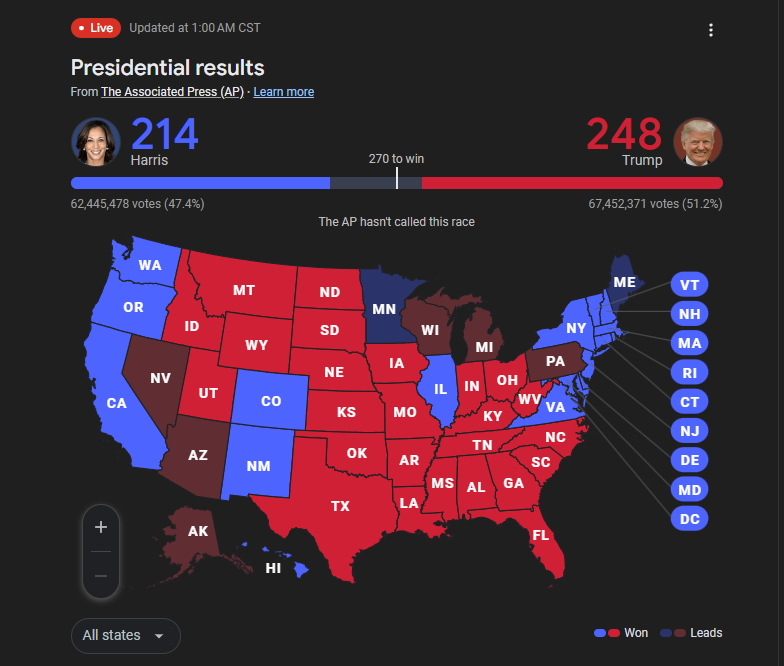

### BUT WHO WINS AT AI/ML/DL/GENERATIVES



jupyterlab server

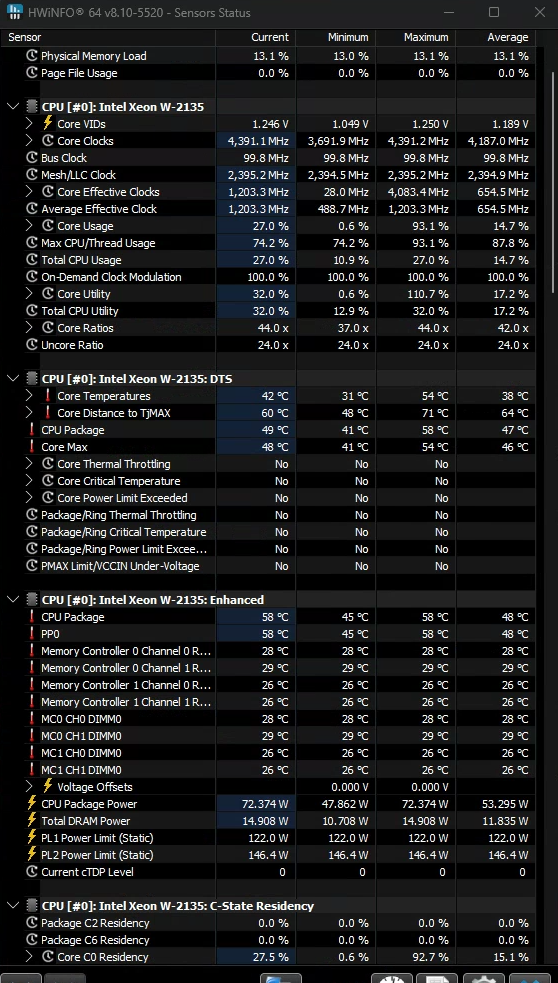


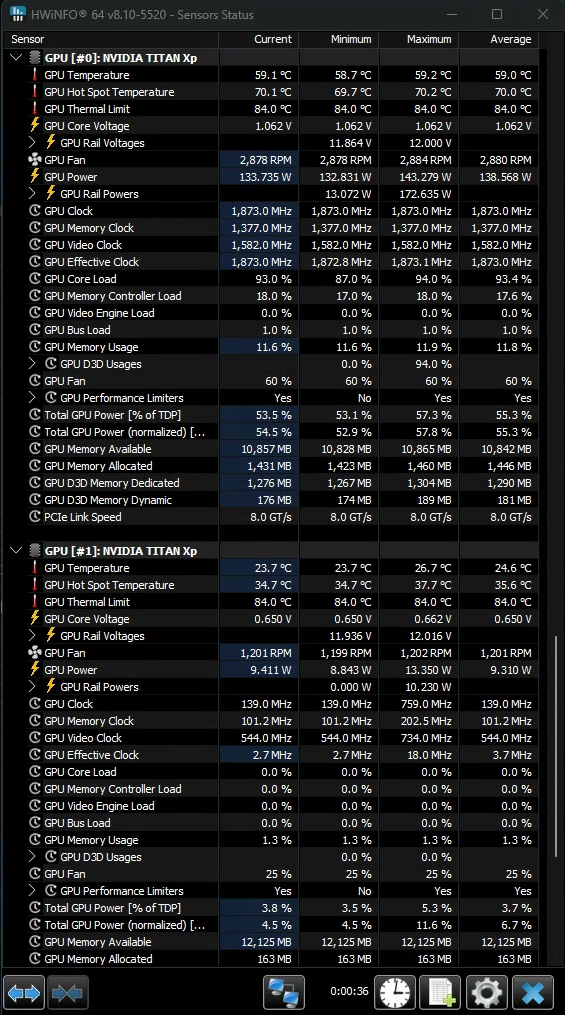


### Only 110-120w on GPU 0, pascal architecture Titan Xp 

### You really dont need gpu's to do/learn/test/mess with any of this type of thing. It can help in certain circumstances greatly

### But in most cases especially for this type of learning running on CPU is fine and fast

### I like doing everything/anything with my Titan Xp's because well they be Titans :)

### They are like a great farm truck that will outlast all my modern junk that feels cheap when its overprices, and yeah its faster but its not as quality. HOW MANY 7900 XTX have I GONE THROUGH holy smokes....

* 3-4 XFX 7900 XTX
* 2 ASRock PG 7900 XTX
* 1 ASUS TUF 7900 XTX - this was mint and cool, should have kept it
* 2 ASRock Creator 7900 XTX, 3rd one is on its way, 1 of them was seriously bad, should have kept the first one
* 1 Nitro + 7900 XTX, again more hotspot issues (40+ delta)
I'm probably missing a few others


Using: cuda
Epoch: 0 | Train loss: 0.7043 | Train acc: 50.01 | Test loss: 0.7035 | Test acc: 49.97 | Device: cuda
Epoch: 5000 | Train loss: 0.0033 | Train acc: 99.92 | Test loss: 0.0033 | Test acc: 99.92 | Device: cuda
Epoch: 10000 | Train loss: 0.0025 | Train acc: 99.93 | Test loss: 0.0024 | Test acc: 99.93 | Device: cuda
Epoch: 15000 | Train loss: 0.0022 | Train acc: 99.93 | Test loss: 0.0022 | Test acc: 99.93 | Device: cuda
Epoch: 20000 | Train loss: 0.0021 | Train acc: 99.93 | Test loss: 0.0021 | Test acc: 99.93 | Device: cuda
Epoch: 25000 | Train loss: 0.0020 | Train acc: 99.93 | Test loss: 0.0020 | Test acc: 99.94 | Device: cuda
Epoch: 30000 | Train loss: 0.0019 | Train acc: 99.93 | Test loss: 0.0019 | Test acc: 99.94 | Device: cuda
Epoch: 35000 | Train loss: 0.0019 | Train acc: 99.94 | Test loss: 0.0018 | Test acc: 99.94 | Device: cuda
Epoch: 40000 | Train loss: 0.0018 | Train acc: 99.94 | Test loss: 0.0018 | Test acc: 99.94 | Device: cuda
Epoch: 45000 | Train loss: 0.0018 | Tra

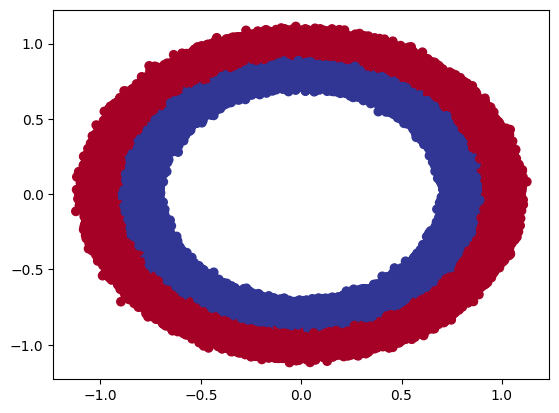

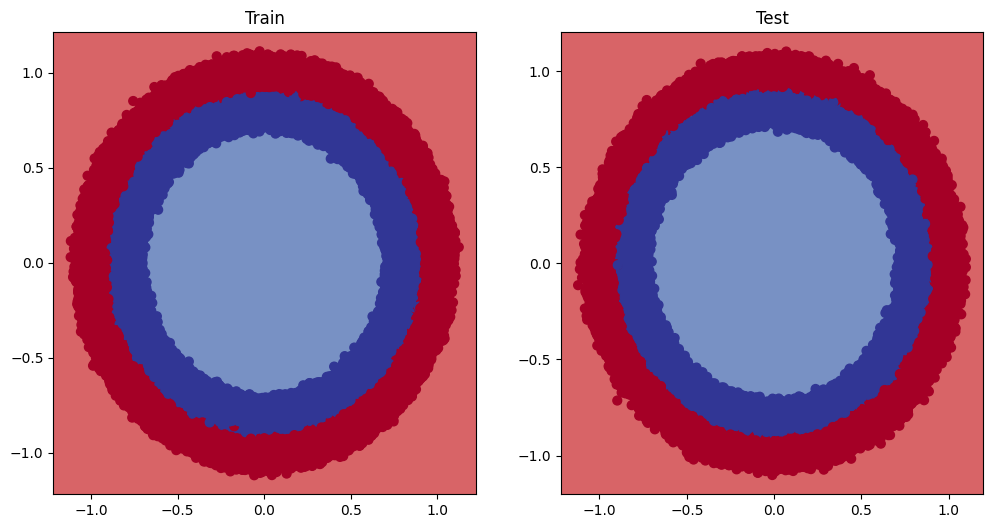

In [ ]:
# Imports
import torch
from torch import nn
import sklearn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import numpy
import pandas as pd
import matplotlib.pyplot as plt
# Not sure if we will need this but we may
import requests
from pathlib import Path

# Random seed static
RANDOM_SEED = 42
# WHERE IS MY FORMATTING...wasnt connected <- dumb

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using: {device}")

# I thought I had some boiler plate code for setting the file path and directory.... you know, i'm thinking for saving the model
# <- dumb



# We want to make some non linear data
n_samples = 800000 # start here, we may turn this up
X, y = make_circles(n_samples, noise = 0.03, random_state = RANDOM_SEED)
# Draw the data
plt.scatter(x = X[:, 0],
            y = X[:, 1],
            c = y,
            cmap = plt.cm.RdYlBu);
    
# Move to torch tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Test/Train split via Scikit-learn
# The 0.2 = 20%, so 20% of the data will be used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = RANDOM_SEED)

# We need to subclass the nn.Module
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        # nn layers
        # We will need something that can handle non-linear data
        self.relu = nn.ReLU() # This function will get injected between the linear layers to make the model non-linear
        # Lets just make this super small for now
        self.layer_1 = nn.Linear(in_features = 2, out_features = 8)
        self.layer_2 = nn.Linear(in_features = 8, out_features = 16)
        self.layer_3 = nn.Linear(in_features = 16, out_features = 8)
        self.layer_4 = nn.Linear(in_features = 8, out_features = 1)
        # Forward pass
    def forward(self, x):
        return self.layer_4(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x))))))

# Instantiate a model and punt to the GPU
model = CircleModel().to(device)

# Make a prediction
with torch.inference_mode():
    untrained_preds = model(X_test.to(device)) # Pass test data to model/device

# Loss func and optimizer
loss_fn = nn.BCEWithLogitsLoss() # Binary cross entropy, this expects logits as input
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.1) # We will prob turn this way up to to 0.1, .001 may not move the needle

# Calc the accuracy
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

model.eval()
with torch.inference_mode():
    y_logits = model(X_test.to(device))[:5] # Get the first 5

y_pred_probs = torch.sigmoid(y_logits)

# We need to take the raw logits, and convert them to probabilities
y_preds = torch.round(y_pred_probs)

# logits -> pred probs -> prediction labels
y_pred_labels = torch.round(torch.sigmoid(model(X_test.to(device))[:5]))

# kill extra dim
y_preds.squeeze()

# Set seed
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

# Set epochs
epochs = 50000 # 5000 should be more than enough

# Move data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Train the model and test
for epoch in range(epochs):
    model.train()
    # Forward pass
    y_logits = model(X_train).squeeze() # Pass the raw logits to the model
    y_pred = torch.round(torch.sigmoid(y_logits)) # Convert the logits to probabilities
    # Calc the loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true = y_train, y_pred = y_pred)
    # Optimizer zero
    optimizer.zero_grad()
    # Backward pass
    loss.backward()
    # Step the optimizer
    optimizer.step()
    # Testing the model
    model.eval()
    with torch.inference_mode():
        # this is very similar to the above training steps
        test_logits = model(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)
    # Print the results
    if epoch % (epochs / 10) == 0: # this should work no matter what we set the epoch size to
        print(f"Epoch: {epoch} | Train loss: {loss.item():.4f} | Train acc: {acc:.2f} | Test loss: {test_loss.item():.4f} | Test acc: {test_acc:.2f} | Device: {device}")

# We will need to grab a 3rd party function to help us plot the decision boundary
if Path("helper_function.py").is_file():
    print("File exists")
else:
    print("Downloading file")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

# the above should work as is
from helper_functions import plot_predictions, plot_decision_boundary

# Plot the decision boundary
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

# I think we can run this, we will tshoot any failures
# Lets change the learning rate first, again
# Ok, we see a curve forming, but ites kinda just dying off and I dont think more epochs is going to change
# Lets update our units in each layer in the model
# lets pop off that last ReLU
# Add some variance in units in the layers
# meh, lets put back, and just bake it for more epochs
# bake longer
# We stop minimize loss pretty early on, lets adjust the learing rate, REVERT and no, REMOVE a layer
# Lets simplify our layers and bake longer
# more ReLU
# We are getting really silly at this point, we will correct it in just a min
# ok lets fix it
# I think this should be good, maybe its our sample size
# I think I just mistyped the noise on generating the train/test data so my results were not expected.....
# LETS GENERATE EVERYTIHIGNGNMIFNGI

# we could have stopped at 5000 epochs, but we will let it run


THANKS FOR WATCHING
